In [4]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn import metrics
import seaborn as sns

# Usado para manipular los datasets de MNIST
from struct import unpack

In [5]:
def loadmnist(imagefile, labelfile):

    # Abrir datos binarios
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Obtener metadatos para las imagenes
    images.read(4) 
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Obtener metadatos para labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Obtener datos
    x = np.zeros((N, rows*cols), dtype=np.uint8)  
    y = np.zeros(N, dtype=np.uint8) 
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Solo un unico byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [6]:
train_img, train_lbl = loadmnist('data/train-images-idx3-ubyte'
                                 , 'data/train-labels-idx1-ubyte')
test_img, test_lbl = loadmnist('data/t10k-images-idx3-ubyte'
                               , 'data/t10k-labels-idx1-ubyte')

In [7]:
print(train_img.shape)

(60000, 784)


In [8]:
print(train_lbl.shape)

(60000,)


In [9]:
print(test_img.shape)

(10000, 784)


In [10]:
print(test_lbl.shape)


(10000,)


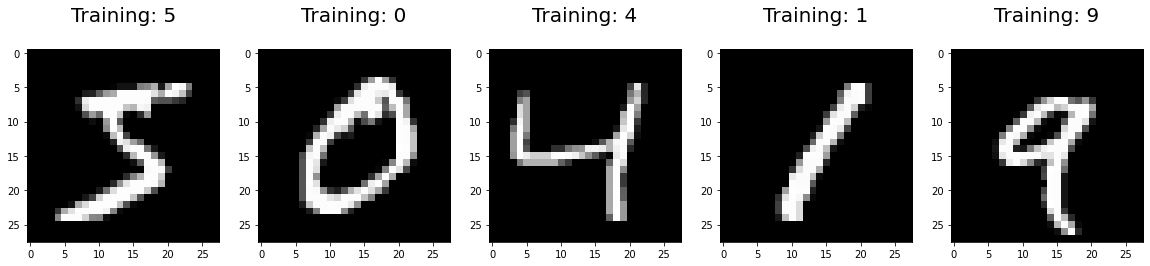

In [11]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)